In [1]:
import os

# 获取当前工作目录

current_directory = os.getcwd()

print("当前工作目录:", current_directory)

当前工作目录: D:\Data\Shap


In [1]:
import pandas as pd
          
import numpy as np

import matplotlib.pyplot as plt
          
from sklearn.model_selection import train_test_split       

C:\Python\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# 设置字体为新罗马数字
plt.rcParams['font.family'] = 'Times New Roman'

# 处理负号          
plt.rcParams['axes.unicode_minus'] = False

# 忽略警告
import warnings
          
warnings.filterwarnings("ignore")

In [4]:
# 读取数据

df = pd.read_csv('data.csv')

# 删除 NaN 值

df.dropna(inplace=True)

# 检查是否还存在缺失值 print(df.isnull().sum())

In [5]:
# 划分特征和目标变量 

# 删除 'target' 列

X = df.drop(['target'], axis=1)        

# 获取 'target' 列作为目标变量

y = df['target']  

In [6]:
# 划分训练集和测试集      
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=df['target'])
# 观察前几行
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

   ca  thal  target  
0   0     1       0  
1   3     0       1  
2   2     2       1  
3   0     0       0  
4   0     0       0

In [7]:
from sklearn.ensemble import RandomForestRegressor

In [8]:
# 创建随机森林回归器实例，并设置参数
rf_regressor = RandomForestRegressor ( 
    
    n_estimators=100,               # 'n_estimators'是森林中树的数量。默认是100，可以根据需要调整。    
    
    criterion='squared_error',      # 'criterion'参数指定用于拆分的质量指标。'squared_error'（默认）表示使用均方误差，另一选项是'absolute_error'。    max_depth=None,           # 'max_depth'限制每棵树的最大深度。'None'表示不限制深度。    min_samples_split=2,      # 'min_samples_split'指定一个节点分裂所需的最小样本数。默认是2。    
    
    min_samples_leaf=1,             # 'min_samples_leaf'指定叶子节点所需的最小样本数。默认是1。    
    
    min_weight_fraction_leaf=0.0,   # 'min_weight_fraction_leaf'与'min_samples_leaf'类似，但基于总样本权重。默认是0.0。    
    
    random_state=42,                # 'random_state'控制随机数生成，以便结果可复现。42是一个常用的随机种子。    
    
    max_leaf_nodes=None,           #  'max_leaf_nodes'限制每棵树的最大叶子节点数。'None'表示不限制。    
    
    min_impurity_decrease=0.0      # 'min_impurity_decrease'在分裂节点时要求的最小不纯度减少量。默认是0.0。

)

In [9]:
# 训练模型
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [11]:
# 获取随机森林模型的特征贡献度（重要性）      
feature_importances = rf_regressor.feature_importances_
          
# 将特征和其重要性一起排序         
sorted_indices = np.argsort(feature_importances)[::-1]  # 逆序排列，重要性从高到低
          
sorted_features = X_train.columns[sorted_indices]
          
sorted_importances = feature_importances[sorted_indices]
          
# 绘制按重要性排序的特征贡献性柱状图        
plt.figure(figsize=(10, 6), dpi=1200) 
          
# 使用渐变色，确保最高值为红色
bars = plt.barh(sorted_features, sorted_importances, color="steelblue")

# 添加坐标轴标签
plt.xlabel('Importance',fontsize=10,fontweight='bold')

plt.ylabel('Feature',fontsize=10,fontweight='bold')

# 设置坐标轴刻度标签的字体大小
plt.tick_params(axis='both', labelsize=8)  # 设置x轴和y轴的刻度标签字体大小

# 设置标题
plt.title(f'RandomForest',loc='left', fontsize=10, fontweight='bold')

# 保存图像为 PDF 文件        
plt.gca().invert_yaxis()
          
plt.savefig("Feature_importance_RandomForest.pdf", format='pdf',bbox_inches='tight')
          
# 显示图表        
plt.show()

In [10]:
# 开始计算Shap值

import shap
          
explainer = shap.TreeExplainer(rf_regressor)
          
# 计算shap值为Explanation格式
          
shap_values_Explanation = explainer(X)

In [11]:
# 宽度为6英寸，高度为8英寸,分辨率为1200
plt.figure(figsize=(6, 8), dpi=1200)
          
# 绘制蜂群图，并设置 show=False 以避免直接显示         
shap.plots.beeswarm(shap_values_Explanation, show=False,max_display=13)
   
# 开启网格线
plt.grid(visible=True, linestyle='--', color='gray', alpha=0.1)  

# 添加坐标轴标签
plt.xlabel('Mean SHAP value(average impact on AHD)',fontsize=10,fontweight='bold')

plt.ylabel('',fontsize=10,fontweight='bold')

# 设置坐标轴刻度标签的字体大小
plt.tick_params(axis='both', labelsize=8)  # 设置x轴和y轴的刻度标签字体大小

# 设置标题
plt.title(f'',loc='left', fontsize=10, fontweight='bold')

# 保存图像为 PDF 文件
plt.savefig(f"Shap_beeswarm_RandomForest.pdf", format='pdf', bbox_inches='tight')

plt.tight_layout()

plt.show()

In [28]:
# 设置 max_display 值
max_display = 13

# 创建图形
plt.figure(figsize=(6,8), dpi=1200)

# 创建 SHAP 值条形图，并使用 max_display 参数限制最多显示的特征数量
shap.plots.bar(shap_values_Explanation, max_display=max_display, show=False)

# 获取当前图形的 Axes
ax = plt.gca()

# 隐藏条形图后面的数字

for text in ax.texts:
    text.set_visible(False)
    
# 获取 SHAP 值并进行排序
shap_values_sorted = shap_values_Explanation.values.flatten()
sorted_indices = np.argsort(shap_values_sorted)[::-1]  # 逆序排列
sorted_shap_values = shap_values_sorted[sorted_indices][:max_display]

# 创建从蓝色到红色的渐变色
colors = plt.cm.autumn(np.linspace(0, 1, max_display))

# 应用颜色到条形图
for i, bar in enumerate(ax.patches):
    bar.set_facecolor(colors[i])

# 添加坐标轴标签
plt.xlabel('Mean SHAP value(average impact on AHD)',fontsize=10)

plt.ylabel('',fontsize=10)

# 设置坐标轴刻度标签的字体大小
plt.tick_params(axis='both', labelsize=10)  # 设置x轴和y轴的刻度标签字体大小

# 设置标题
plt.title(f'',loc='left', fontsize=10, fontweight='bold')

# 保存图像为 PDF 文件
plt.savefig(f"Shap_importance_RandomForest.pdf", format='pdf', bbox_inches='tight')

plt.tight_layout()

plt.show()


In [22]:
plt.figure(figsize=(10, 5), dpi=1200)
          
# 创建 SHAP 值条形图，展示数据        
shap.plots.bar(shap_values_Explanation[1], show_data=True, show=False, max_display=13)
          
# 添加坐标轴标签
plt.xlabel('Shaply',fontsize=10,fontweight='bold')

plt.ylabel('Feature',fontsize=10,fontweight='bold')

# 设置坐标轴刻度标签的字体大小
plt.tick_params(axis='both', labelsize=8)  # 设置x轴和y轴的刻度标签字体大小

# 设置标题
plt.title(f'RandomForest',loc='left', fontsize=10, fontweight='bold')

# 保存图像为 PDF 文件 
plt.savefig("SHAP_bar_RandomForest.pdf", format='pdf', bbox_inches='tight')
          
plt.tight_layout()
          
plt.show()

In [29]:
plt.figure(figsize=(6, 8), dpi=1200)
          
# 绘制第1个样本的 SHAP 瀑布图，并设置 show=False 以避免直接显示         
shap.plots.waterfall(shap_values_Explanation[1], show=False, max_display=13)

# 添加坐标轴标签
plt.xlabel('Shaply',fontsize=10,fontweight='bold')

plt.ylabel('Feature',fontsize=10,fontweight='bold')

# 设置坐标轴刻度标签的字体大小
plt.tick_params(axis='both', labelsize=8)  # 设置x轴和y轴的刻度标签字体大小

# 设置标题
plt.title(f'',loc='left', fontsize=10, fontweight='bold')
          
# 保存图像为 PDF 文件       
plt.savefig("SHAP_waterfall_RandomForest.pdf", format='pdf', bbox_inches='tight')
          
plt.tight_layout()
          
plt.show()

<Figure size 1000x600 with 0 Axes>

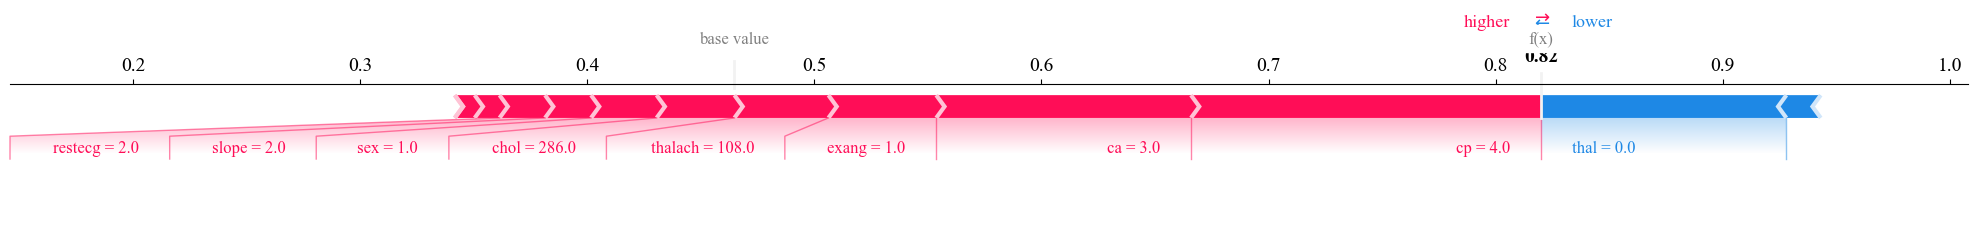

In [36]:
# 设置全局字体大小
plt.rcParams.update({'font.size': 14})

# 创建力图
plt.figure(figsize=(10, 6))  # 调整图形尺寸

shap.force_plot(shap_values_Explanation[1],matplotlib=True,show=False)

plt.savefig("SHAP_force_RandomForest.pdf", format='pdf', bbox_inches='tight')

plt.tight_layout()

plt.show()

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
# 使用随机森林建模
model_rf = RandomForestClassifier(
    
                                  n_estimators=100, 
                                  
                                  criterion='gini', 
                                  
                                  bootstrap=True, 
                                  
                                  max_depth=3, 
                                  
                                  random_state=8
                                 
                                   )

In [32]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=8)

In [33]:
import shap

explainer = shap.TreeExplainer(model_rf)

shap_values = explainer.shap_values(X_train)

print("基准值:",explainer.expected_value)

print("shap值维度:",shap_values.shape)

基准值: [0.54063291 0.45936709]
shap值维度: (237, 13, 2)


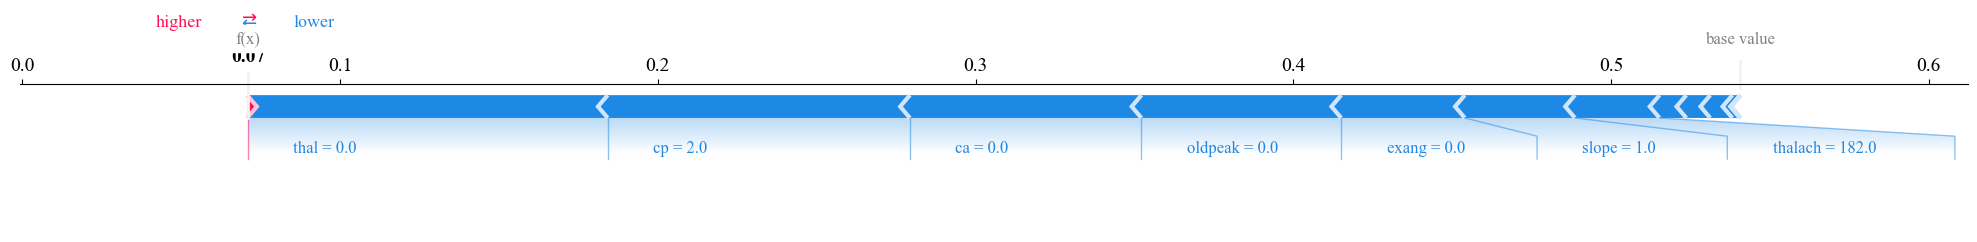

In [38]:
# 可视化X_train中第1个样本的第0类别的SHAP值，展示各个特征对该样本在第0类别上的预测的贡献情况
sample_index = 0

# 绘制力图 
shap.force_plot(
                explainer.expected_value[0],          # 类别 0 的基准值（即模型在不知道任何特征时对类别 0 的平均预测值）
                
                shap_values[sample_index,:,0],        # 第1个样本的所有特征对类别0预测的SHAP值
                
                X_test.iloc[sample_index],            # 第0个样本的特征值，这里的f(X)=0.91实际上就是随机森林RF模型预测这一个样本为0这一类的概率
                
                matplotlib=True ,                    # 使用 Matplotlib 绘制可视化图形
                
                show=False)

plt.savefig("SHAP_force_RandomForest1.pdf", format='pdf', bbox_inches='tight')

plt.tight_layout()

plt.show()

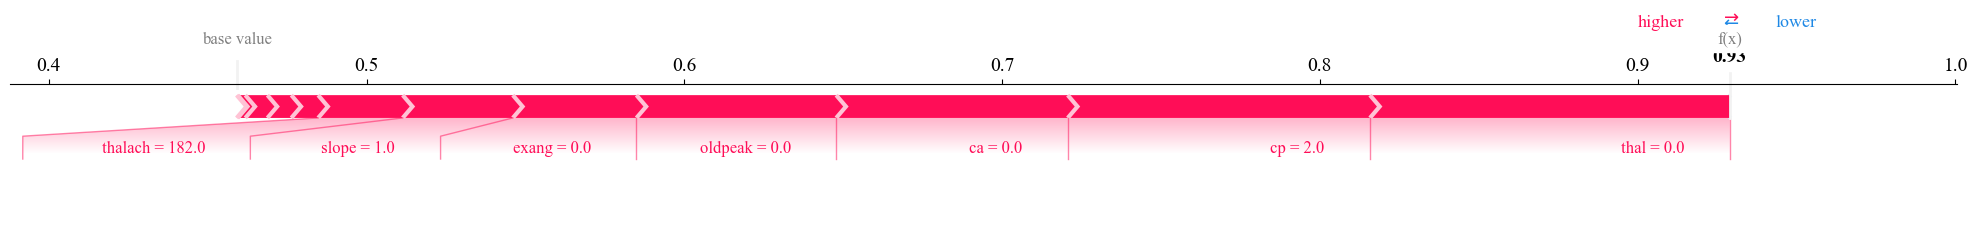

In [39]:
# 可视化X_train中第0个样本的第1类别的SHAP值，展示各个特征对该样本在第1类别上的预测的贡献情况

sample_index = 0

# 绘制力图 

shap.force_plot(
                explainer.expected_value[1],          # 类别 0 的基准值（即模型在不知道任何特征时对类别1的平均预测值）
                
                shap_values[sample_index,:,1],        # 第1个样本的所有特征对类别1预测的SHAP值
                
                X_test.iloc[sample_index],            # 第0个样本的特征值，这里的f(X)=0.09实际上就是随机森林RF模型预测这一个样本为1这一类的概率
                
                matplotlib=True,                      # 使用 Matplotlib 绘制可视化图形
                
                show=False)

plt.savefig("SHAP_force_RandomForest2.pdf", format='pdf', bbox_inches='tight')

plt.tight_layout()

plt.show()